# A taste for classification

This dataset contains data about 150 couples with their corresponding Divorce Predictors Scale variables (DPS) on the basis of Gottman couples therapy.

The couples are from various regions of Turkey wherein the records were acquired from face-to-face interviews from couples who were already divorced or happily married.

All responses were collected on a 5 point scale (0=Never, 1=Seldom, 2=Averagely, 3=Frequently, 4=Always).

Source:
https://www.kaggle.com/andrewmvd/divorce-prediction


## Import required packages

In [9]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from dmba import plotDecisionTree
import pydotplus 

In [10]:
divorce_df = pd.read_csv('divorce_data.csv')
divorce_df.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q46,Q47,Q48,Q49,Q50,Q51,Q52,Q53,Q54,Divorce
0,2,2,4,1,0,0,0,0,0,0,...,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,...,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,...,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,...,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,...,2,1,2,3,2,2,2,1,0,1


In [11]:
divorce_df.shape

(170, 55)

In [12]:
divorce_df.Divorce = divorce_df.Divorce.apply(lambda v: 'Divorce' if v==1 else 'Not_divorce')

In [13]:
divorce_df

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q46,Q47,Q48,Q49,Q50,Q51,Q52,Q53,Q54,Divorce
0,2,2,4,1,0,0,0,0,0,0,...,2,1,3,3,3,2,3,2,1,Divorce
1,4,4,4,4,4,0,0,4,4,4,...,2,2,3,4,4,4,4,2,2,Divorce
2,2,2,2,2,1,3,2,1,1,2,...,3,2,3,1,1,1,2,2,2,Divorce
3,3,2,3,2,3,3,3,3,3,3,...,2,2,3,3,3,3,2,2,2,Divorce
4,2,2,1,1,1,1,0,0,0,0,...,2,1,2,3,2,2,2,1,0,Divorce
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,0,0,0,0,0,0,0,0,0,0,...,1,0,4,1,1,4,2,2,2,Not_divorce
166,0,0,0,0,0,0,0,0,0,0,...,4,1,2,2,2,2,3,2,2,Not_divorce
167,1,1,0,0,0,0,0,0,0,1,...,3,0,2,0,1,1,3,0,0,Not_divorce
168,0,0,0,0,0,0,0,0,0,0,...,3,3,2,2,3,2,4,3,1,Not_divorce


In [14]:
question_df = pd.read_csv('Questions.csv')
question_df.head()

,atribute_id,description
0,1,If one of us apologizes when our discussion de...
1,2,I know we can ignore our differences even if t...
2,3,When we need it we can take our discussions wi...
3,4,When I discuss with my spouse to contact him w...
4,5,The time I spent with my wife is special for us.


In [15]:
question_df.atribute_id = question_df.atribute_id.apply(lambda v: 'Q{}'.format(v))

In [16]:
question_df.set_index('atribute_id',drop=True,inplace=True)

In [17]:
question_df.head()

,description
atribute_id,
Q1,If one of us apologizes when our discussion de...
Q2,I know we can ignore our differences even if t...
Q3,When we need it we can take our discussions wi...
Q4,When I discuss with my spouse to contact him w...
Q5,The time I spent with my wife is special for us.


In [18]:
divorce_df.describe()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q45,Q46,Q47,Q48,Q49,Q50,Q51,Q52,Q53,Q54
count,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,...,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000
mean,1.776471,1.652941,1.764706,1.482353,1.541176,0.747059,0.494118,1.452941,1.458824,1.576471,...,2.458824,2.552941,2.270588,2.741176,2.382353,2.429412,2.476471,2.517647,2.241176,2.011765
std,1.627257,1.468654,1.415444,1.504327,1.632169,0.904046,0.898698,1.546371,1.557976,1.421529,...,1.499925,1.371786,1.586841,1.137348,1.511587,1.405090,1.260238,1.476537,1.505634,1.667611
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000
50%,2.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,2.000000,...,3.000000,3.000000,2.000000,3.000000,3.000000,2.000000,3.000000,3.000000,2.000000,2.000000
75%,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,1.000000,3.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000


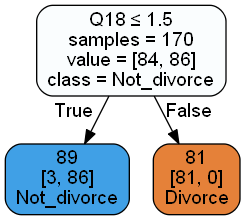

In [19]:
classTree = DecisionTreeClassifier(max_depth=1)
classTree.fit(divorce_df.drop(columns=['Divorce']), divorce_df['Divorce'])

plotDecisionTree(classTree, feature_names=question_df.index, class_names=classTree.classes_)

In [20]:
question_df.loc['Q18'].description

'My spouse and I have similar ideas about how marriage should be'

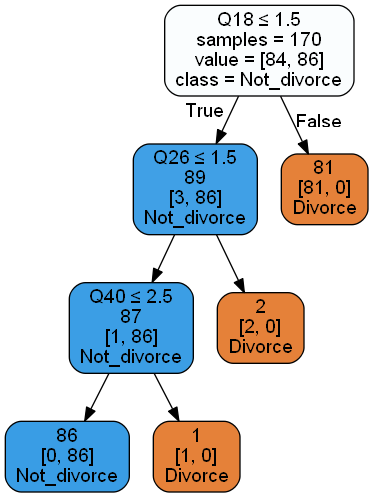

In [21]:
classTree = DecisionTreeClassifier()
classTree.fit(divorce_df.drop(columns=['Divorce']), divorce_df['Divorce'])

plotDecisionTree(classTree, feature_names=question_df.index, class_names=classTree.classes_)

In [22]:
question_df.loc['Q26'].description

"I know my spouse's basic anxieties."

In [23]:
question_df.loc['Q40'].description

"We're just starting a discussion before I know what's going on."

In [24]:
divorce_df.groupby('Divorce').Q40.mean()

Divorce
Divorce        3.571429
Not_divorce    0.209302
Name: Q40, dtype: float64

In [25]:
for col in question_df.index:
    print(question_df.loc[col].description)
    print(divorce_df.groupby('Divorce')[col].mean())
    print('----------------------------------------')

If one of us apologizes when our discussion deteriorates the discussion ends.
Divorce
Divorce        3.190476
Not_divorce    0.395349
Name: Q1, dtype: float64
----------------------------------------
I know we can ignore our differences even if things get hard sometimes.
Divorce
Divorce        2.869048
Not_divorce    0.465116
Name: Q2, dtype: float64
----------------------------------------
When we need it we can take our discussions with my spouse from the beginning and correct it.
Divorce
Divorce        2.916667
Not_divorce    0.639535
Name: Q3, dtype: float64
----------------------------------------
When I discuss with my spouse to contact him will eventually work.
Divorce
Divorce        2.726190
Not_divorce    0.267442
Name: Q4, dtype: float64
----------------------------------------
The time I spent with my wife is special for us.
Divorce
Divorce        3.011905
Not_divorce    0.104651
Name: Q5, dtype: float64
----------------------------------------
We don't have time at home as 

# Use the model:

We ask the next maried person the following three quesitons. 

How much do you agree with the following statements:

    - My spouse and I have similar ideas about how marriage should be
    - I know my spouse's basic anxieties
    - We're just starting a discussion before I know what's going on
    
We asked Rohan Frey and they answered the followings: Always (4), Always (4), Never(0) 

